In [108]:
# Importing Libraries 
import numpy as np   
import pandas as pd  
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [2]:
#Import dataset 
dataset = pd.read_excel('C:/Users/Lenovo/Desktop/rajan/Project/Dataset.xlsx')  

In [3]:
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. . .The filming...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive
5,I sure would like to see a resurrection of a u...,positive
6,If you like original gut wrenching laughter yo...,positive
7,This a fantastic movie of three prisoners who ...,positive
8,Some films just simply should not be remade. T...,positive
9,"I remember this film,it was the first film i h...",positive


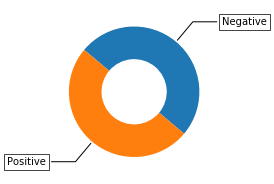

In [4]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(dataset.sentiment.value_counts(), wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    if i==1:
        ax.annotate('Positive', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    if i!=1:
        ax.annotate('Negative', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    
plt.show()

In [5]:
dataset.review[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. . .The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. . .It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. . .I would say the main appeal of the show is due to the fact that it goes where ot

In [6]:
# library to clean data 
import re  
  
# Natural Language Tool Kit 
import nltk  
  
nltk.download('stopwords') 
 
# to remove stopword 
from nltk.corpus import stopwords 
  
# for Stemming propose  
from nltk.stem.porter import PorterStemmer 
  
# Initialize empty array 
# to append clean text  
corpus = []  
  
# 10000 (reviews) rows to clean 
for i in range(0, 10000):  
      
    # column : "Review", row ith 
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])  
      
    # convert all cases to lower cases 
    review = review.lower()  
      
    # split to array(default delimiter is " ") 
    review = review.split()  
      
    # creating PorterStemmer object to 
    # take main stem of each word 
    ps = PorterStemmer()  
      
    # loop for stemming each word 
    # in string array at ith row     
    review = [ps.stem(word) for word in review 
                if not word in set(stopwords.words('english'))]  
                  
    # rejoin all string array elements 
    # to create back into a string 
    review = ' '.join(review)   
      
    # append each string to create 
    # array of clean text  
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Poonam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
corpus

['one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side',
 'won

In [8]:
# Creating the Bag of Words model 
from sklearn.feature_extraction.text import CountVectorizer 
  
# To extract max 15000 feature. 
cv = CountVectorizer(max_features = 15000)  
  
# X contains corpus (dependent variable) 
X = cv.fit_transform(corpus).toarray()  
  

In [9]:
from sklearn.feature_extraction.text import TfidfTransformer  
tf = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

Xtf = tf.fit_transform(X).toarray()

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer  
tf = TfidfTransformer(norm='l2', use_idf=False, smooth_idf=True, sublinear_tf=False)

Xft = tf.fit_transform(X).toarray()

In [11]:
# y contains answers if review 
# is positive or negative 
y = dataset['sentiment'].values  

In [12]:
#Converting label to 1 or 0
sentiment = {'positive': 1,'negative': 0} 

y = [sentiment[item] for item in y]

In [13]:
#Exporting the frequency termed corpus to file
pickle_out = open("X_rr_freq.pickle","wb")
pickle.dump(Xft, pickle_out)
pickle_out.close()

In [14]:
def topwords(corpus, n):
    
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [15]:
top_words= topwords(corpus,100)

In [16]:
from wordcloud import WordCloud

In [17]:
tt=str(top_words)
tt=re.sub('[^a-zA-Z]', ' ', tt)

In [18]:
#Importing the countvectorized corpus to file

pickle_in = open("X_rr_cv.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
y = pickle.load(pickle_in)

In [19]:
#Importing the tf-idf corpus to file

pickle_in = open("X_rr_tf.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
y = pickle.load(pickle_in)

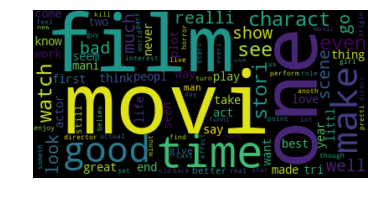

In [20]:
wordcloud = WordCloud().generate(tt)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
#Term Frequency

In [22]:
def print_score(cv_score):
    
    accuracy_cv=cv_score['test_accuracy'].mean() * 100
    precision_cv=cv_score['test_precision'].mean() * 100
    recall_cv=cv_score['test_recall'].mean() * 100
    f1_cv=cv_score['test_f1'].mean() * 100
    
    return (accuracy_cv,precision_cv,recall_cv,f1_cv)

In [23]:

pickle_in = open("X_rr_freq.pickle","rb")
Xf = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
yf = pickle.load(pickle_in)

In [24]:
np.shape(Xf) 

(10000, 15000)

In [25]:
np.shape(yf) 

(10000,)

In [26]:
# Splitting the dataset into 
# the Training set and Test set 
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.20) 

In [27]:
# Fitting Random Forest Classification
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
# n_estimators can be said as number of 
# trees
modelf = RandomForestClassifier(n_estimators = 1001, 
                            criterion = 'entropy') 
                              
modelf.fit(Xf_train, yf_train)  

# Predicting the Test set results 
yf_pred_rf =modelf.predict(Xf_test) 
  
yf_pred_rf 

# Making the Confusion Matrix 
 
cm_rff = confusion_matrix(yf_test, yf_pred_rf) 
cm_rff

array([[813, 161],
       [124, 902]], dtype=int64)

In [28]:
acf = accuracy_score(yf_test, yf_pred_rf)
acc_rff = acf * 100
acc_rff

85.75

In [29]:
# Fitting Multinomial Naive Bayes Classification
# to the Training set 
classifierf = MultinomialNB(alpha=0.1)
classifierf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred = classifierf.predict(Xf_test)
cmf = confusion_matrix(yf_test, yf_pred) 
cmf

array([[842, 132],
       [155, 871]], dtype=int64)

In [91]:
acf = accuracy_score(yf_test, yf_pred)
acc_mnbf = acf * 100
acc_mnbf

85.65

In [31]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier_bnbf = BernoulliNB(alpha=0.8)
classifier_bnbf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_bnbf = classifier_bnbf.predict(Xf_test)

cm_bnbf = confusion_matrix(yf_test, yf_pred_bnbf)
cm_bnbf

array([[819, 155],
       [169, 857]], dtype=int64)

In [32]:
ac_bnbf = accuracy_score(yf_test, yf_pred_bnbf)
acc_bnbf = ac_bnbf * 100
acc_bnbf

83.8

In [33]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier_lrf = linear_model.LogisticRegression(solver='lbfgs',max_iter = 500)
classifier_lrf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_lr = classifier_lrf.predict(Xf_test)
cm_lrf = confusion_matrix(yf_test, yf_pred_lr) 
cm_lrf

array([[820, 154],
       [120, 906]], dtype=int64)

In [34]:
ac_lrf = accuracy_score(yf_test, yf_pred_lr)
acc_lrf = ac_lrf * 100
acc_lrf

86.3

In [35]:
# Neural Network

# Fitting NN to the Training set
from sklearn.neural_network import MLPClassifier
classifier_nnf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
classifier_nnf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_nn = classifier_nnf.predict(Xf_test)
cm_nnf = confusion_matrix(yf_test, yf_pred_nn)  
cm_nnf

array([[808, 166],
       [143, 883]], dtype=int64)

In [36]:
ac_nnf = accuracy_score(yf_test, yf_pred_nn)
acc_nnf = ac_nnf * 100
acc_nnf

84.55

In [38]:
# Decision Tree
# Fitting DT to the Training set
from sklearn import tree
classifier_dtf = tree.DecisionTreeClassifier()
classifier_dtf.fit(Xf_train, yf_train)

# Predicting the Test set results
yf_pred_dt = classifier_dtf.predict(Xf_test)
cm_dtf = confusion_matrix(yf_test, yf_pred_dt)
cm_dtf

array([[690, 284],
       [305, 721]], dtype=int64)

In [39]:
ac_dtf = accuracy_score(yf_test, yf_pred_dt)
acc_dtf = ac_dtf * 100
acc_dtf

70.55

In [42]:
# Perform 10-fold cross validation Random Forest
scoresrff = cross_validate(modelf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
cvtf_acc_rf = print_score(scoresrff)
cvtf_acc_rf


(86.03, 85.30228361784691, 87.1, 86.17566995934436)

In [43]:
# Perform 10-fold cross validation Naive Bayes
scoresnbf = cross_validate(classifierf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
cvtf_acc_mnb = print_score(scoresnbf)
cvtf_acc_mnb

(85.94000000000001, 86.46056792112581, 85.28, 85.85249179170049)

In [44]:
# Perform 10-fold cross validation Bernoulli Naive Bayes
scoresbnbf = cross_validate(classifier_bnbf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
cvtf_acc_bnb = print_score(scoresbnbf)
cvtf_acc_bnb

(85.4, 86.10965609615263, 84.46000000000001, 85.2611231486724)

In [45]:
# Perform 10-fold cross validation Logistic Regression
scoreslrf = cross_validate(classifier_lrf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
cvtf_acc_lr = print_score(scoreslrf)
cvtf_acc_lr

(86.29999999999998, 85.40659149452814, 87.6, 86.47504456055731)

In [46]:
# Perform 10-fold cross validation Neural Network
scoresnnf = cross_validate(classifier_nnf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
cvtf_acc_nn = print_score(scoresnnf)
cvtf_acc_nn

(85.16, 84.77071962521654, 85.74, 85.2443013419586)

In [47]:
# Perform 10-fold cross validation Decision Tree
scoresdtf = cross_validate(classifier_dtf, Xf, yf, cv=10,scoring=['accuracy','precision','recall','f1'])
cvtf_acc_dt = print_score(scoresdtf)
cvtf_acc_dt

(71.1, 71.02886756249326, 71.32, 71.15848878700473)

In [50]:
#Count Vectorization
#Importing the countvectorized corpus to file
pickle_in = open("X_rr_cv.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
y = pickle.load(pickle_in)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20) 

In [51]:
# Fitting Random Forest Classification
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees
model = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
model.fit(X_train, y_train)  

# Predicting the Test set results 
y_pred_rf = model.predict(X_test) 
  
y_pred_rf 

  
cm_rf = confusion_matrix(y_test, y_pred_rf) 
cm_rf

array([[864, 143],
       [140, 853]], dtype=int64)

In [52]:
ac = accuracy_score(y_test, y_pred_rf)
acc_rfcv = ac * 100
acc_rfcv

85.85000000000001

In [53]:
# Fitting Multinomial Naive Bayes Classification
# to the Training set 
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
  
cm_mnb = confusion_matrix(y_test, y_pred) 
cm_mnb

array([[863, 144],
       [186, 807]], dtype=int64)

In [54]:
acc_mnb = accuracy_score(y_test, y_pred)
acc_mnbcv = acc_mnb * 100
acc_mnbcv

83.5

In [55]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier_bnb = BernoulliNB(alpha=0.8)
classifier_bnb.fit(X_train, y_train)

# Predicting the Test set results
y_pred_bnb = classifier_bnb.predict(X_test)

cm_bnb = confusion_matrix(y_test, y_pred_bnb)  
cm_bnb

array([[865, 142],
       [178, 815]], dtype=int64)

In [56]:
ac_bnb = accuracy_score(y_test, y_pred_bnb)
acc_bnbcv  = ac_bnb * 100
acc_bnbcv 

84.0

In [57]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier_lr = linear_model.LogisticRegression(solver = 'lbfgs',max_iter = 500)
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier_lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)  
cm_lr

array([[865, 142],
       [131, 862]], dtype=int64)

In [58]:
ac_lr = accuracy_score(y_test, y_pred_lr)
acc_lrcv = ac_lr * 100
acc_lrcv

86.35000000000001

In [59]:
# Neural Network

# Fitting NN to the Training set
from sklearn.neural_network import MLPClassifier
classifier_nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
classifier_nn.fit(X_train, y_train)

# Predicting the Test set results
y_pred_nn = classifier_nn.predict(X_test)
cm_nn = confusion_matrix(y_test, y_pred_nn)  
cm_nn

array([[849, 158],
       [149, 844]], dtype=int64)

In [60]:
ac_nn = accuracy_score(y_test, y_pred_nn)
acc_nncv = ac_nn * 100
acc_nncv

84.65

In [61]:
# Decision Tree
# Fitting DT to the Training set
from sklearn import tree
classifier_dt = tree.DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)  
cm_dt

array([[714, 293],
       [317, 676]], dtype=int64)

In [62]:
ac_dt = accuracy_score(y_test, y_pred_dt)
acc_dtcv = ac_dt * 100
acc_dtcv

69.5

In [63]:
# Perform 10-fold cross validation Random Forest
scoresrf = cross_validate(model, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_rf  = print_score(scoresrf)
cv_acc_rf

(85.95, 85.43783752978298, 86.7, 86.052706429022)

In [64]:
# Perform 10-fold cross validation Naive Bayes
scoresnb = cross_validate(classifier, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_mnb = print_score(scoresnb)
cv_acc_mnb

(84.07, 85.34874025219767, 82.29999999999998, 83.78460559463257)

In [65]:
# Perform 10-fold cross validation Bernoulli Naive Bayes
scoresbnb = cross_validate(classifier_bnb, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_bnb = print_score(scoresbnb)
cv_acc_bnb

(85.4, 86.10965609615263, 84.46000000000001, 85.2611231486724)

In [66]:
# Perform 10-fold cross validation Logistic Regression
scoreslr = cross_validate(classifier_lr, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_lr = print_score(scoreslr)
cv_acc_lr

(86.06, 85.29890168107673, 87.16000000000001, 86.21133592959357)

In [67]:
# Perform 10-fold cross validation Neural Network
scoresnn = cross_validate(classifier_nn, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_nn = print_score(scoresnn)
cv_acc_nn

(84.72999999999999, 84.31967383514906, 85.35999999999999, 84.82772923872047)

In [68]:
# Perform 10-fold cross validation Decision Tree
scoresdt = cross_validate(classifier_dt, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_dt = print_score(scoresdt)
cv_acc_dt

(70.7, 70.67807282316897, 70.78, 70.71680899179808)

In [ ]:
# Perform 10-fold cross validation SVM
scores = cross_validate(classifier_svm, X, y, cv=10,scoring=['accuracy','precision','recall','f1'])
cv_acc_svm = print_score(scores)
cv_acc_svm

In [69]:
#Term Frequency - Inverse Document Frequency
#Importing the tfidf corpus to file

pickle_in = open("X_rr_tf.pickle","rb")
Xtf = pickle.load(pickle_in)

pickle_in = open("y_rr_cv.pickle","rb")
ytf = pickle.load(pickle_in)

Xtf_train, Xtf_test, ytf_train, ytf_test = train_test_split(Xtf, ytf, test_size = 0.20) 

In [70]:
# Fitting Random Forest Classification
# to the Training set 
from sklearn.ensemble import RandomForestClassifier 
  
# n_estimators can be said as number of 
# trees
modeltf = RandomForestClassifier(n_estimators = 501, 
                            criterion = 'entropy') 
                              
modeltf.fit(Xtf_train, ytf_train)  

# Predicting the Test set results 
ytf_pred_rtf =modeltf.predict(Xtf_test)   
ytf_pred_rtf 

# Making the Confusion Matrix   
cm_rtf = confusion_matrix(ytf_test, ytf_pred_rtf) 
cm_rtf

array([[836, 147],
       [130, 887]], dtype=int64)

In [71]:
actf = accuracy_score(ytf_test, ytf_pred_rtf)
acc_rtidf = actf * 100
acc_rtidf

86.15

In [72]:
# Fitting Multinomial Naive Bayes Classification
# to the Training set 
from sklearn.naive_bayes import MultinomialNB
classifiertf = MultinomialNB(alpha=0.1)
classifiertf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred = classifiertf.predict(Xtf_test)
  
cmtf = confusion_matrix(ytf_test, ytf_pred) 
cmtf 

array([[837, 146],
       [164, 853]], dtype=int64)

In [73]:
actf = accuracy_score(ytf_test, ytf_pred)
acc_mnbidf = actf * 100
acc_mnbidf

84.5

In [74]:
# Bernoulli NB

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import BernoulliNB
classifier_bnbtf = BernoulliNB(alpha=0.8)
classifier_bnbtf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_bnb = classifier_bnbtf.predict(Xtf_test)
cm_bnbtf = confusion_matrix(ytf_test, ytf_pred_bnb) 
cm_bnbtf

array([[847, 136],
       [158, 859]], dtype=int64)

In [75]:
ac_bnbtf = accuracy_score(ytf_test, ytf_pred_bnb)
acc_bnbidf = ac_bnbtf * 100
acc_bnbidf

85.3

In [76]:
# Logistic Regression

# Fitting Logistic Regression to the Training set
from sklearn import linear_model
classifier_lrtf = linear_model.LogisticRegression(solver='lbfgs',max_iter = 500)
classifier_lrtf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_lr = classifier_lrtf.predict(Xtf_test)
cm_lrtf = confusion_matrix(ytf_test, ytf_pred_lr)  
cm_lrtf

array([[830, 153],
       [ 95, 922]], dtype=int64)

In [77]:
ac_lrtf = accuracy_score(ytf_test, ytf_pred_lr)
acc_lridf  = ac_lrtf * 100
acc_lridf 

87.6

In [78]:
# Neural Network

# Fitting NN to the Training set
from sklearn.neural_network import MLPClassifier
classifier_nntf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1)
classifier_nntf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_nntf = classifier_nntf.predict(Xtf_test)
cm_nntf = confusion_matrix(ytf_test, ytf_pred_nntf)  
cm_nntf

array([[838, 145],
       [126, 891]], dtype=int64)

In [79]:
ac_nntf = accuracy_score(ytf_test, ytf_pred_nntf)
acc_nnidf  = ac_nntf * 100
acc_nnidf 

86.45

In [80]:
# Decision Tree
# Fitting DT to the Training set
from sklearn import tree
classifier_dttf = tree.DecisionTreeClassifier()
classifier_dttf.fit(Xtf_train, ytf_train)

# Predicting the Test set results
ytf_pred_dttf = classifier_dttf.predict(Xtf_test)
cm_dttf = confusion_matrix(ytf_test, ytf_pred_dttf)  
cm_dttf

array([[691, 292],
       [292, 725]], dtype=int64)

In [81]:
ac_dttf = accuracy_score(ytf_test, ytf_pred_dttf)
acc_dtidf  = ac_dttf * 100
acc_dtidf 

70.8

In [82]:
# Pertform 10-tfold cross validation Random Forest
scoresrtftf = cross_validate(modeltf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

cvidf_acc_rf  = print_score(scoresrtftf)
cvidf_acc_rf 

(85.72, 85.11228658002376, 86.61999999999999, 85.84502154808223)

In [83]:
# Pertform 10-tfold cross validation Naive Bayes
scoresnbtf = cross_validate(classifiertf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

cvidf_acc_mnb  = print_score(scoresnbtf)
cvidf_acc_mnb 

(84.44, 84.80877712323134, 83.93999999999998, 84.36439654575467)

In [84]:
# Pertform 10-tfold cross validation Bernoulli Naive Bayes
scoresbnbtf = cross_validate(classifier_bnbtf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

cvidf_acc_bnb  = print_score(scoresbnbtf)
cvidf_acc_bnb  

(85.4, 86.10965609615263, 84.46000000000001, 85.2611231486724)

In [85]:
# Pertform 10-tfold cross validation Logistic Regression
scoreslrtf = cross_validate(classifier_lrtf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

cvidf_acc_lr  = print_score(scoreslrtf)
cvidf_acc_lr 

(87.72, 86.15309211185436, 89.94000000000003, 87.98683720176741)

In [86]:
# Pertform 10-tfold cross validation Neural Network
scoresnntf = cross_validate(classifier_nntf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

cvidf_acc_nn  = print_score(scoresnntf)
cvidf_acc_nn 

(85.81, 85.3800397442901, 86.44000000000001, 85.89905088204489)

In [87]:
# Pertform 10-tfold cross validation Decision Tree
scoresdttf = cross_validate(classifier_dttf, Xtf, ytf, cv=10,scoring=['accuracy','precision','recall','f1'])

cvidf_acc_dt  = print_score(scoresdttf)
cvidf_acc_dt 

(70.78, 70.91488456768315, 70.44, 70.65949693564681)

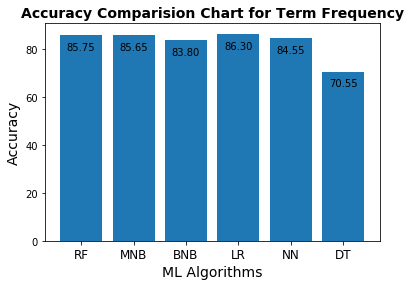

In [92]:
#Comparision chart for Term Frequency

algo_name_tf = ['RF','MNB','BNB','LR','NN','DT'] #,'SVM']
results = [acc_rff, acc_mnbf, acc_bnbf, acc_lrf,acc_nnf,acc_dtf] #, acc_svmf]
y_pos = np.arange(len(results))
plt.bar(algo_name_tf,results)

# zip joins x and y coordinates in pairs
for x,y in zip(algo_name_tf,results):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.xticks(y_pos, algo_name_tf,fontsize=12)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('ML Algorithms',fontsize=14)
plt.title('Accuracy Comparision Chart for Term Frequency', fontsize=14,fontweight='bold')

plt.show()

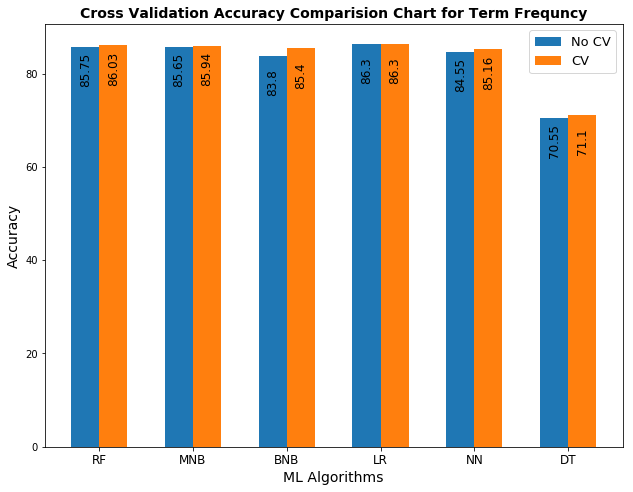

In [117]:
#Compare accuracy with and withoud Cross - Validation

cvtf_acc_rfa = round(cvtf_acc_rf[0],2)
cvtf_acc_mnba = round(cvtf_acc_mnb[0],2)
cvtf_acc_bnba = round(cvtf_acc_bnb[0],2)
cvtf_acc_lra = round(cvtf_acc_lr[0] ,2)
cvtf_acc_nna = round(cvtf_acc_nn[0] ,2)
cvtf_acc_dta = round(cvtf_acc_dt[0],2)

cvtf_results = [cvtf_acc_rfa,cvtf_acc_mnba,cvtf_acc_bnba,cvtf_acc_lra,cvtf_acc_nna,cvtf_acc_dta]
algo_name_tf = ['RF','MNB','BNB','LR','NN','DT']
y_pos = np.arange(len(cvtf_results))


width = 0.30  # the width of the bars
x = np.arange(len(algo_name_tf))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results, width, label='No CV')
rects2 = ax.bar(x + width/2, cvtf_results, width, label='CV')
            
ax.set_ylabel('Accuracy',fontsize=14)
ax.set_xlabel('ML Algorithms',fontsize=14)
ax.set_title('Cross Validation Accuracy Comparision Chart for Term Frequncy',fontsize=14,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(algo_name_tf,fontsize=12)
#yticks(xrange(10), rotation='vertical')
ax.legend(bbox_to_anchor= (1.0, 1.00),prop={'size': 13})

                
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -40),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation="vertical", fontsize=12)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(15, 8)
plt.show()

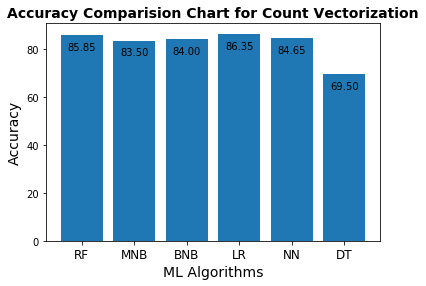

In [126]:
#Comparision chart for Count Vectorization

results_cv = [round(acc_rfcv,2), acc_mnbcv, acc_bnbcv, round(acc_lrcv,2),acc_nncv,acc_dtcv]
algo_name_cv = ['RF','MNB','BNB','LR','NN','DT']
y_pos = np.arange(len(results_cv))
plt.bar(algo_name_cv, results_cv)

# zip joins x and y coordinates in pairs
for x,y in zip(algo_name_cv,results_cv):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center


plt.xticks(y_pos, algo_name_cv,fontsize=12)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('ML Algorithms',fontsize=14)
plt.title('Accuracy Comparision Chart for Count Vectorization',fontsize=14,fontweight='bold')
plt.show()

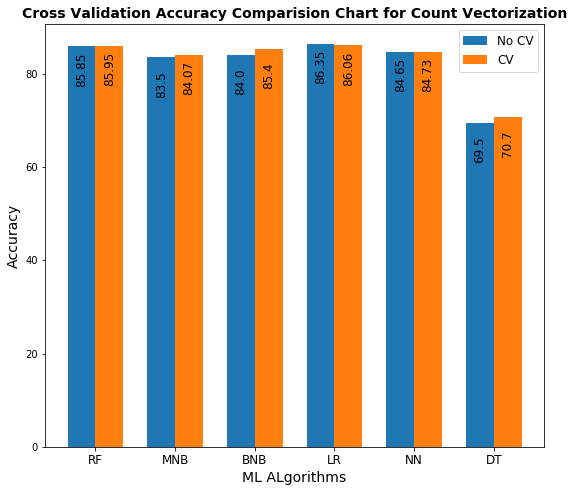

In [127]:
#Compare accuracy with and withoud Cross - Validation

cv_acc_rfa = round(cv_acc_rf[0],2)
cv_acc_mnba = round(cv_acc_mnb[0],2)
cv_acc_bnba = round(cv_acc_bnb[0],2)
cv_acc_lra = round(cv_acc_lr[0],2)
cv_acc_nna = round(cv_acc_nn[0],2)
cv_acc_dta = round(cv_acc_dt[0],2)

cv_results = [cv_acc_rfa,cv_acc_mnba,cv_acc_bnba,cv_acc_lra,cv_acc_nna,cv_acc_dta]
algo_name_cv = ['RF','MNB','BNB','LR','NN','DT']
y_pos = np.arange(len(cv_results))

width = 0.35  # the width of the bars


x = np.arange(len(algo_name_cv))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results_cv, width, label='No CV')
rects2 = ax.bar(x + width/2, cv_results, width, label='CV')
            
ax.set_ylabel('Accuracy',fontsize=14)
ax.set_xlabel('ML ALgorithms', fontsize=14)
ax.set_title('Cross Validation Accuracy Comparision Chart for Count Vectorization',fontsize=14,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(algo_name_cv, fontsize=12)
#yticks(xrange(10), rotation='vertical')
ax.legend(bbox_to_anchor= (1.0, 1.00),prop={'size': 12})

                
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -40),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation="vertical", fontsize=12)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(15, 8)
plt.show()

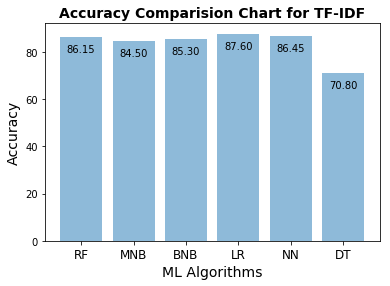

In [101]:
#Comparision chart for Term Frequency - Inverse Document Frequency


results_idf = [acc_rtidf, acc_mnbidf, acc_bnbidf, acc_lridf,acc_nnidf,acc_dtidf]
results_idf
algo_name_idf = ['RF','MNB','BNB','LR','NN','DT']
y_pos = np.arange(len(results_idf))

plt.bar(algo_name_idf, results_idf, align='center', alpha=0.5)

# zip joins x and y coordinates in pairs
for x,y in zip(algo_name_idf,results_idf):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center




plt.xticks(y_pos, algo_name_idf,fontsize=12)
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('ML Algorithms',fontsize=14)
plt.title('Accuracy Comparision Chart for TF-IDF',fontsize=14,fontweight='bold')

plt.show()

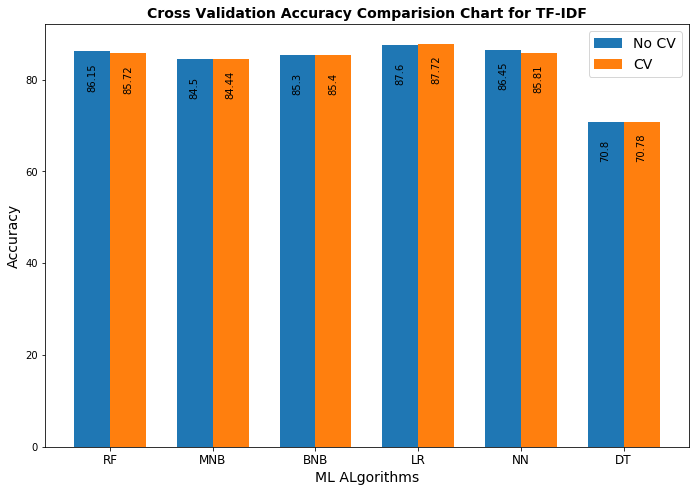

In [134]:
#Compare accuracy with and withoud Cross - Validation

cvidf_acc_rfa = cvidf_acc_rf[0] 
cvidf_acc_mnba = cvidf_acc_mnb[0] 
cvidf_acc_bnba = cvidf_acc_bnb[0] 
cvidf_acc_lra = cvidf_acc_lr[0]
cvidf_acc_nna = cvidf_acc_nn[0]
cvidf_acc_dta = cvidf_acc_dt[0] 

cvidf_results = [cvidf_acc_rfa,cvidf_acc_mnba,cvidf_acc_bnba,cvidf_acc_lra,cvidf_acc_nna,cvidf_acc_dta]
y_pos = np.arange(len(cv_results))

algo_name_idf
cvidf_results
results_idf
width = 0.35  # the width of the bars


x = np.arange(len(algo_name_idf))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, results_idf, width, label='No CV')
rects2 = ax.bar(x + width/2, cvidf_results, width, label='CV')
            
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_xlabel('ML ALgorithms', fontsize=14)
ax.set_title('Cross Validation Accuracy Comparision Chart for TF-IDF', fontsize=14,fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(algo_name_idf,fontsize=12)
#yticks(xrange(10), rotation='vertical')
ax.legend(bbox_to_anchor= (1.0, 1.00),prop={'size': 14})

                
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, -40),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation="vertical")

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.set_size_inches(15, 8)
plt.show()

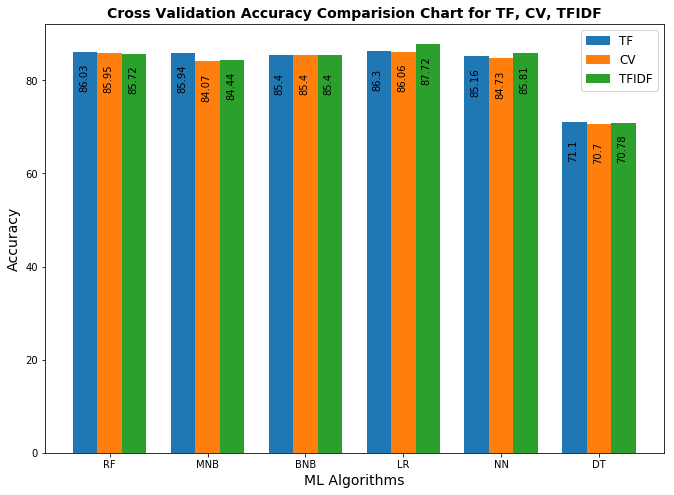

In [135]:
barWidth = 0.25  # the width of the bars
bars1 = cvtf_results
bars2 = cv_results
bars3 = cvidf_results

N = 3
r1 = np.arange(len(bars1))
x = np.arange(len(algo_name_idf))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(r1, cvtf_results, barWidth, label='TF')
rects2 = ax.bar(r1+barWidth, cv_results, barWidth, label='CV')
rects3 = ax.bar(r1+2*barWidth, cvidf_results, barWidth, label='TFIDF')


ax.set_ylabel('Accuracy',fontsize=14)
ax.set_xlabel('ML Algorithms',fontsize=14)
ax.set_title('Cross Validation Accuracy Comparision Chart for TF, CV, TFIDF',fontsize=14,fontweight='bold' )
ax.set_xticks(x+barWidth)
ax.set_xticklabels(algo_name_idf)
ax.legend(bbox_to_anchor= (1.0, 1.00),prop={'size': 12})

                
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 3, height),
                    xytext=(3, -40),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation="vertical")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)


fig.tight_layout()
fig.set_size_inches(15, 8)
plt.show()